In [16]:
import numpy as np
import pandas as pd

In [17]:
'''각 년도 별로 births가 10 미만인 이름들의 갯수. column은 성별로 합니다.'''

years = range(1880,2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years :
    path = 'C:/Users/홍길동/OneDrive - 한양대학교/대외활동/코멘토/3주차/과제/NORMAL/datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path,names=columns)
    
    frame['year'] = year
    pieces.append(frame) 

names = pd.concat(pieces, ignore_index=True)       
print(names)

              name sex  births  year
0             Mary   F    7065  1880
1             Anna   F    2604  1880
2             Emma   F    2003  1880
3        Elizabeth   F    1939  1880
4           Minnie   F    1746  1880
...            ...  ..     ...   ...
1690779    Zymaire   M       5  2010
1690780     Zyonne   M       5  2010
1690781  Zyquarius   M       5  2010
1690782      Zyran   M       5  2010
1690783      Zzyzx   M       5  2010

[1690784 rows x 4 columns]


sex      F     M
year            
1880   363   419
1881   357   403
1882   395   448
1883   403   387
1884   442   463
...    ...   ...
2006  8634  6024
2007  8916  6213
2008  8859  6287
2009  8695  6197
2010  8541  6052

[131 rows x 2 columns]


<Axes: xlabel='year'>

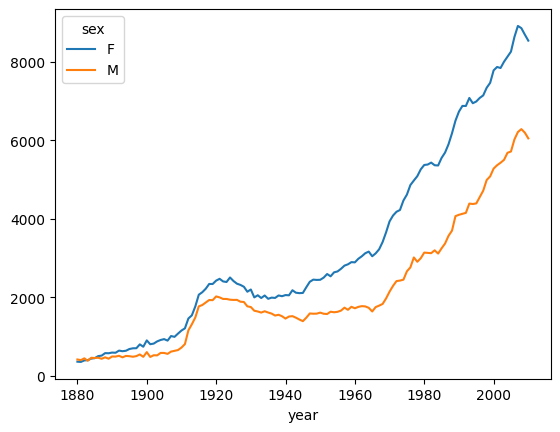

In [18]:
filtered_names = names.groupby(['year', 'name', 'sex'])['births'].sum().reset_index()
filtered_names = filtered_names[filtered_names['births'] < 10]

pivot_table_result = filtered_names.pivot_table(index='year', columns='sex', values='name', aggfunc='count', fill_value=0)

print(pivot_table_result)

pivot_table_result.plot()


In [19]:
print('연도가 지나갈수록 BIRTHS가  10 미만인 이름의 갯수가 커지고 있다.')

연도가 지나갈수록 BIRTHS가  10 미만인 이름의 갯수가 커지고 있다.


In [20]:
pd.options.display.float_format = '{:.4f}'.format

user_columns = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('C:/Users/홍길동/OneDrive - 한양대학교/대외활동/코멘토/3주차/과제/NORMAL/datasets/movielens/users.dat', sep='::', header=None, names=user_columns, encoding='latin1')

rating_columns = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('C:/Users/홍길동/OneDrive - 한양대학교/대외활동/코멘토/3주차/과제/NORMAL/datasets/movielens/ratings.dat', sep='::', header=None, names=rating_columns, encoding='latin1')

movie_columns = ['movie_id', 'title', 'genres']
movies = pd.read_table('C:/Users/홍길동/OneDrive - 한양대학교/대외활동/코멘토/3주차/과제/NORMAL/datasets/movielens/movies.dat', sep='::', header=None, names=movie_columns, encoding='latin1')


C:\Users\홍길동\AppData\Local\Temp\ipykernel_10360\1522268781.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_table('C:/Users/홍길동/OneDrive - 한양대학교/대외활동/코멘토/3주차/과제/NORMAL/datasets/movielens/users.dat', sep='::', header=None, names=user_columns, encoding='latin1')
C:\Users\홍길동\AppData\Local\Temp\ipykernel_10360\1522268781.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_table('C:/Users/홍길동/OneDrive - 한양대학교/대외활동/코멘토/3주차/과제/NORMAL/datasets/movielens/ratings.dat', sep='::', header=None, names=rating_columns, encoding='latin1')
C:\Users\홍길동\AppData\Local\Temp\ipykernel_10

In [21]:
''' 1 코드를 보면 각 성별간 평점 평균 격차가 가장 큰 것을 확인한 부분이 있습니다.
   현재 diff는 남자의 평점 평균에서 여자의 평점 평균을 뺸걸로 되있습니다.
   이렇게 하지말고 diff를 구하는데 평정 평균의 차에 절대값을 씌워서 column을 채워봅니다.
   그리고 이 차이가 가장 큰 영화 순으로 )정렬하고 위에서 부터 10개의 영화 목록을 출력합니다.'''

merged_data = pd.merge(ratings, users, on='user_id')

avg_ratings = merged_data.groupby(['movie_id', 'gender'])['rating'].mean().unstack()

avg_ratings['diff'] = abs(avg_ratings['F'] - avg_ratings['M'])

sorted_movies = avg_ratings.sort_values(by='diff', ascending=False)

top_10_movies = sorted_movies.head(10)

result = pd.merge(top_10_movies, movies, on='movie_id')[['movie_id', 'title', 'diff']]

print(result)

   movie_id                                              title   diff
0       682         Tigrero: A Film That Was Never Made (1994) 3.3333
1       687                                Country Life (1994) 3.0000
2      3136                       James Dean Story, The (1957) 3.0000
3      2823  Spiders, The (Die Spinnen, 1. Teil: Der Golden... 3.0000
4       138                             Neon Bible, The (1995) 3.0000
5       264                                   Enfer, L' (1994) 2.7500
6       776                                   Babyfever (1994) 2.6667
7       760                                  Stalingrad (1993) 2.5938
8      3641                           Woman of Paris, A (1923) 2.5714
9      2777                                       Cobra (1925) 2.5000


In [22]:
''' 2. 평점을 준 갯수가 100개 이상인 영화를 추출합니다. 여기서 구할 것은 다음과 같습니다.
    "전체 영화중 평점을 준 갯수가 100개 이상인 영화는 전체의 몇%인가"'''

merged_data = pd.merge(ratings, users, on='user_id')

rating_counts = merged_data['movie_id'].value_counts()

popular_movies = rating_counts[rating_counts >= 100]

percentage = len(popular_movies) / len(movies) * 100

print(f"평점을 준 갯수가 100개 이상인 영화는 전체 영화의 {percentage:.2f}%를 차지합니다.")


평점을 준 갯수가 100개 이상인 영화는 전체 영화의 52.00%를 차지합니다.


In [23]:
'''
 3. timestamp와 평점이 상관이 있는지 확인해봅니다. 즉 timestamp가 높을수록 영화 평점이 높은지
    아니면 이 2개는 관계가 있는건지 확인하고 이 상관관계를 mathplot을 활용해 표현해 봅니다.'''

import pandas as pd
import matplotlib.pyplot as plt

df = ratings[['rating','timestamp']]
df

,rating,timestamp
0,5,978300760
1,3,978302109
2,3,978301968
3,4,978300275
4,5,978824291
...,...,...
1000204,1,956716541
1000205,5,956704887
1000206,5,956704746
1000207,4,956715648


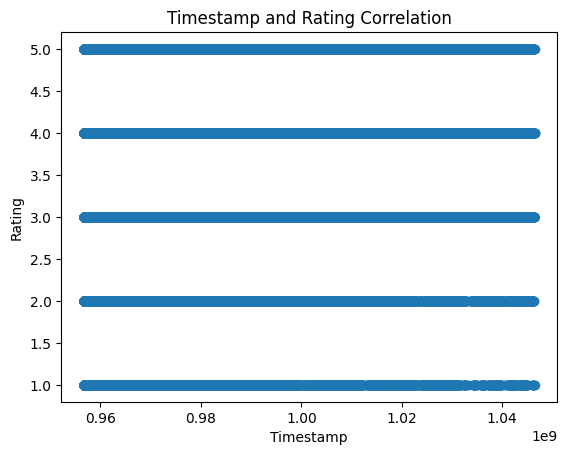

Timestamp and Rating Correlation: -0.02676995389914311


In [25]:
correlation = df['timestamp'].corr(df['rating'])

plt.scatter(df['timestamp'], df['rating'], alpha=0.5)
plt.xlabel('Timestamp')
plt.ylabel('Rating')
plt.title('Timestamp and Rating Correlation')
plt.show()

print("Timestamp and Rating Correlation:", correlation)